<a href="https://colab.research.google.com/github/DiwakarChaurasia/LETSGROWMORE/blob/main/Iris_Flower_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Intern At LetsGrowMore**

## **LGMVIP - JAN 2023**

### **TASK 2 - IRIS FLOW CLASSIFICATION ML PROJECT**

### **Author - Diwakar Chaurasia**

**Importing Libraries & Dataset**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import datasets #For Visualization
import seaborn as sns #Visualization

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Load the iris dataset
iris_data_path = ("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
iris_df = pd.read_csv(iris_data_path)
print("Dataset loaded successfully!")

Dataset loaded successfully!


# **Exploring Dataset**

In [7]:
# Checking number of rows and columns in the data set
print('\nNumber of rows and columns in the data set: ',iris_df.shape)


Number of rows and columns in the data set:  (150, 5)


In [9]:
#Visualize Data
iris_df.head() # Give the first 5 rows

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
iris_df.tail() #Give the last 5 rows

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [11]:
iris_df.info() #Give the info about the data type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
iris_df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
iris_df.isnull().sum() 

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

**We have no null values in this dataset.**

In [14]:
iris_df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

# **Performing Data Visualization**

**Pair Plot**

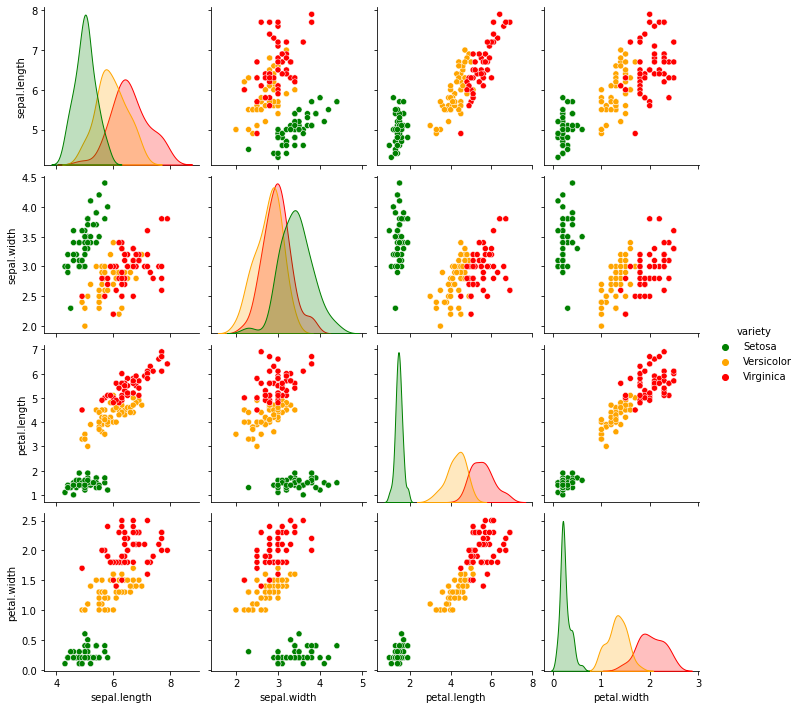

In [19]:
colors = {'Setosa': 'green', 'Versicolor': 'orange', 'Virginica': 'red'}
sns.pairplot(iris_df, hue='variety', palette=colors)
plt.show()

**Heat Map**

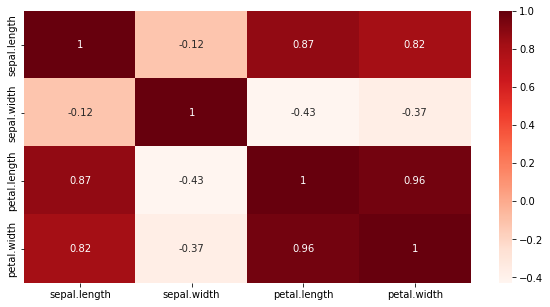

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(iris_df.corr(), annot=True, cmap='Reds')
plt.show()

# **Model Building**

*Splitting Data in X & Y*

In [21]:
X = iris_df.drop(['variety'], axis=1)
y = iris_df['variety']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


***Split the dataset into a training set and a testing set***

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


# **Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Training Completed!")

Training Completed!


## ***Making Prediction***

In [25]:
y_pred = logreg.predict(X_test)
print(y_pred)

['Versicolor' 'Virginica' 'Virginica' 'Setosa' 'Virginica' 'Versicolor'
 'Setosa' 'Virginica' 'Setosa' 'Versicolor' 'Versicolor' 'Virginica'
 'Virginica' 'Virginica' 'Setosa' 'Setosa' 'Virginica' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Setosa' 'Versicolor'
 'Versicolor' 'Virginica' 'Versicolor' 'Versicolor' 'Versicolor'
 'Virginica' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica']


## ***Checking Accuracy***


In [26]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


# **KNeighbors Classifier**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Training Completed!")

Training Completed!


## ***Making Prediction***

In [28]:
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

['Versicolor' 'Virginica' 'Virginica' 'Setosa' 'Virginica' 'Versicolor'
 'Setosa' 'Virginica' 'Setosa' 'Versicolor' 'Versicolor' 'Virginica'
 'Virginica' 'Virginica' 'Setosa' 'Setosa' 'Virginica' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Setosa' 'Virginica'
 'Versicolor' 'Virginica' 'Versicolor' 'Versicolor' 'Versicolor'
 'Virginica' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica']


## ***Checking Accuracy***

In [29]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_knn))

0.9473684210526315
